<a href="https://colab.research.google.com/github/Ricartt/Analise_Estudantes/blob/main/projeto_estudates.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisando informações de dados de alunos.

Essa análise tem como base, dados retirados do site kaggle.com
As análises feitas não são afirmações, apenas conclusões com base nos dados informados e analisados.


---






*  **Importando as bibliotecas**




In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


*  **Lendo a base de dados**

In [ ]:
Basedados = pd.read_csv('StudentsPerformance.csv')

# Verificando as dimensões
Basedados.shape

(1000, 8)

Temos 1000 linhas e 8 colunas

In [ ]:
# head
Basedados.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75




*  **Campos nulos**



<Axes: title={'center': 'Analizando Campos Nulos'}>

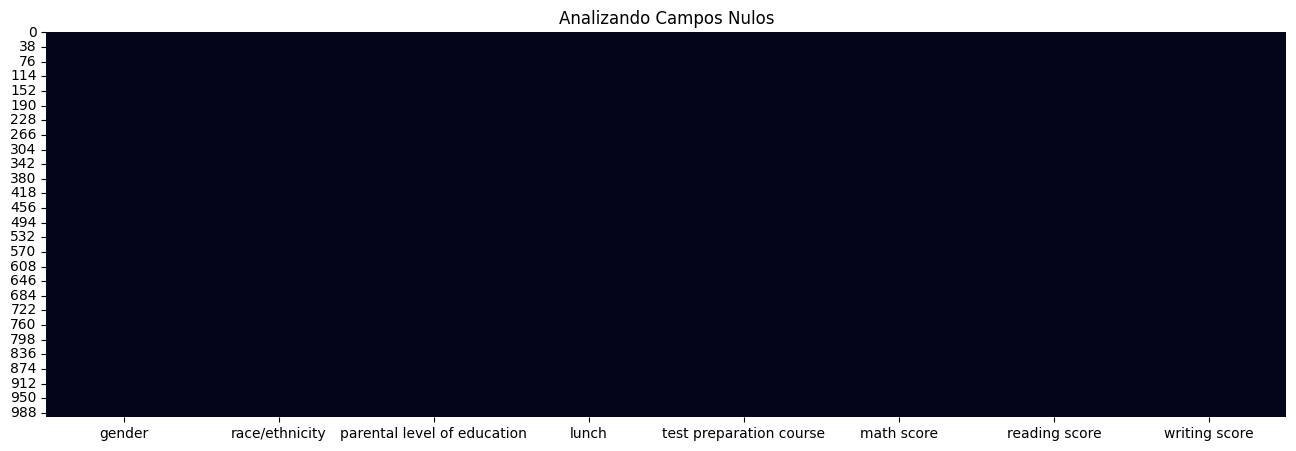

In [ ]:
Nulos = Basedados.isnull()
plt.figure(figsize=(16,5))
plt.title('Analizando Campos Nulos')
sns.heatmap(Nulos, cbar=False)

podemos observar que não temos campos nulos nessa base.



* **Únicos**


In [ ]:
Basedados.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64



*  **Verificando campos duplicados**



In [ ]:
Basedados.duplicated().sum()

0



* **Estatística**



In [ ]:
Basedados.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [ ]:
Basedados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


*  **Divisões por gênero**

In [ ]:
Basedados['gender'].value_counts(normalize=True) * 100

female    51.8
male      48.2
Name: gender, dtype: float64




*   **Divisões por grupo**



In [ ]:
Basedados['race/ethnicity'].value_counts(normalize=True) * 100

group C    31.9
group D    26.2
group B    19.0
group E    14.0
group A     8.9
Name: race/ethnicity, dtype: float64

grupo A com menor inferência



*  **Nível educacional**



In [ ]:
Basedados['parental level of education'].value_counts(normalize=True) * 100

some college          22.6
associate's degree    22.2
high school           19.6
some high school      17.9
bachelor's degree     11.8
master's degree        5.9
Name: parental level of education, dtype: float64

Mestrado menor inferencia
some college com a maior inferencia

In [ ]:
Basedados['lunch'].value_counts(normalize=True) * 100

standard        64.5
free/reduced    35.5
Name: lunch, dtype: float64

64.5% dos alunos optaram pelo lanche padrão

In [ ]:
Basedados['test preparation course'].value_counts(normalize=True) * 100

none         64.2
completed    35.8
Name: test preparation course, dtype: float64

Podemos observar que 35.8% dos alunos fizeram preparação para prova.

<Axes: xlabel='math score', ylabel='gender'>

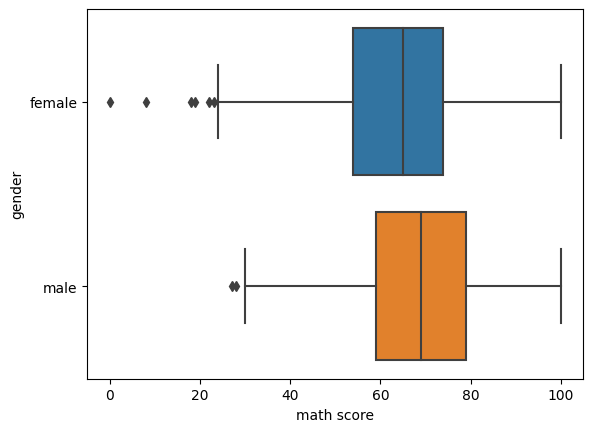

In [ ]:
sns.boxplot(data = Basedados, x='math score', y='gender')

Alunos do sexo masculino apresentam uma performace melhor em matemática.

<Axes: xlabel='reading score', ylabel='gender'>

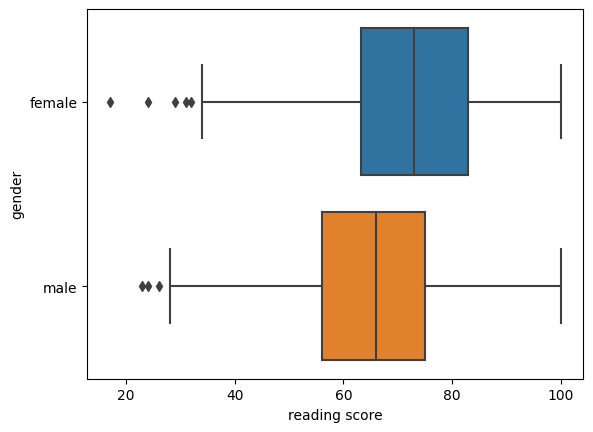

In [ ]:
sns.boxplot(data = Basedados, x='reading score', y='gender')

Em contra partida alunos do sexo feminino apresentam um melhor desempenho com relação aos alunos do sexo masculino em provas orais.

<Axes: xlabel='writing score', ylabel='gender'>

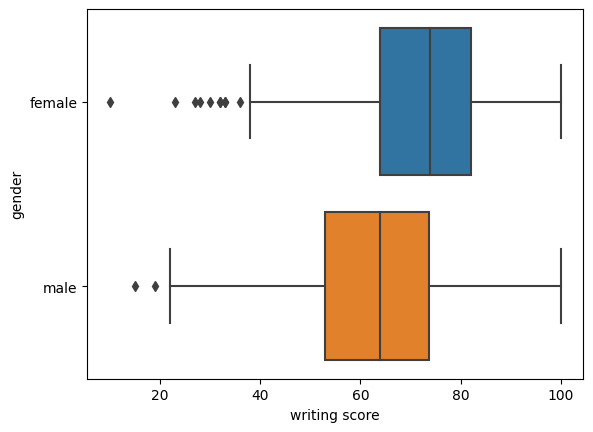

In [ ]:
sns.boxplot(data = Basedados, x='writing score', y='gender')

Alunos do sexo femino também apresentaram uma melhor performace nas provas escritas.

*  **Análise por tabela**







In [ ]:
Basedados.groupby(by=['gender']).describe()['math score'].reset_index()

,gender,count,mean,std,min,25%,50%,75%,max
0,female,518.0,63.633205,15.491453,0.0,54.0,65.0,74.0,100.0
1,male,482.0,68.728216,14.356277,27.0,59.0,69.0,79.0,100.0




*   **Densidade de kernel em camada**



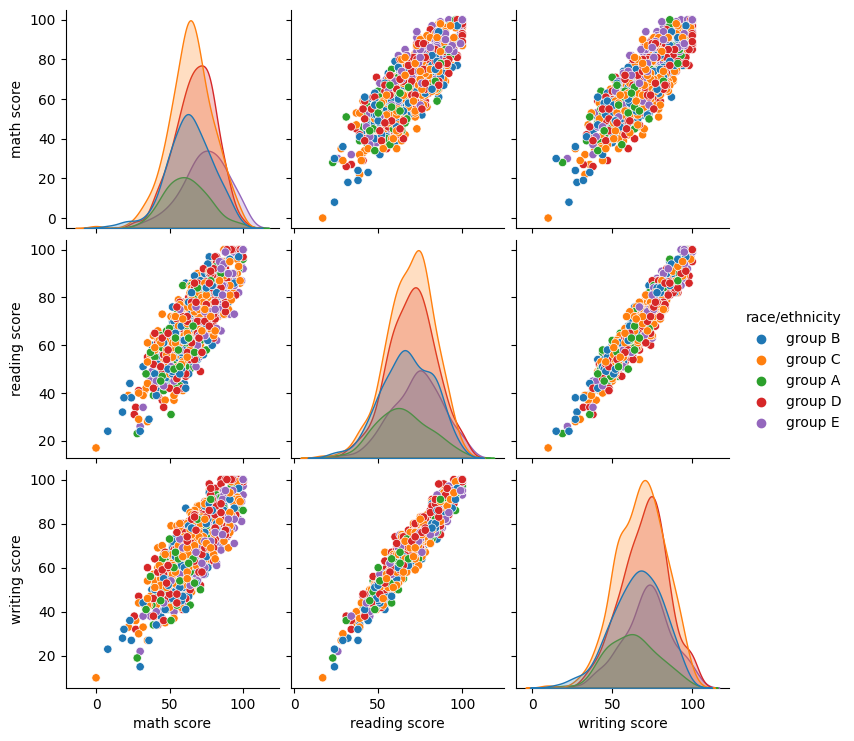

In [ ]:

sns.pairplot(Basedados, hue='race/ethnicity')

<Axes: xlabel='math score', ylabel='race/ethnicity'>

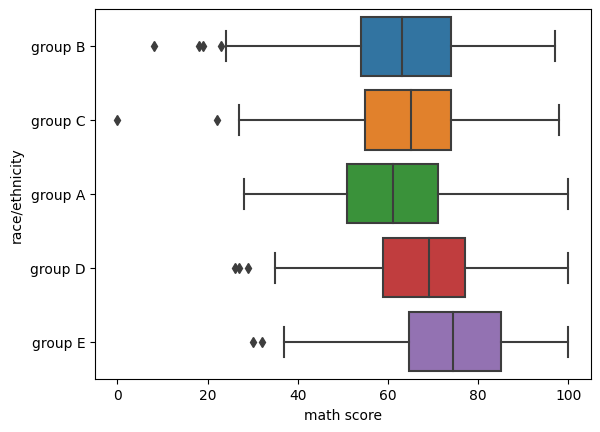

In [ ]:
sns.boxplot(data=Basedados, x='math score', y='race/ethnicity')

<Axes: xlabel='math score', ylabel='parental level of education'>

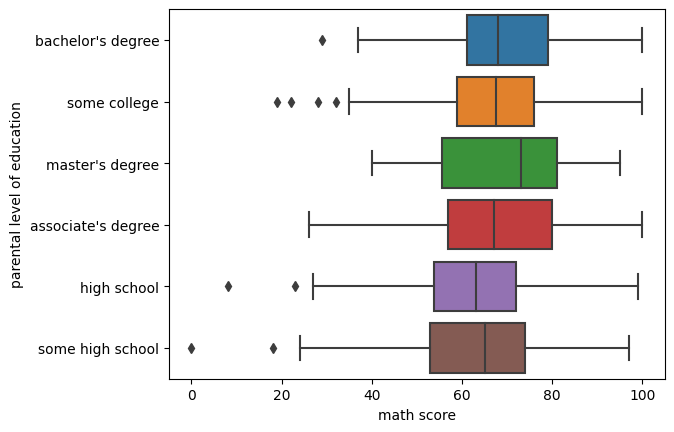

In [ ]:
sns.boxplot(data=Basedados, x='math score', y='parental level of education')

Pode se observar que é muito claro de acordo com a análise feita que alunos que tem pais com ensino superior possuem notas melhores com relaçaõ aos outros alunos.



* **Análise da tabela**



In [ ]:
Basedados.groupby(by=['parental level of education']).describe()['math score'].reset_index()

,parental level of education,count,mean,std,min,25%,50%,75%,max
0,associate's degree,222.0,67.882883,15.112093,26.0,57.00,67.0,80.0,100.0
1,bachelor's degree,118.0,69.389831,14.943789,29.0,61.00,68.0,79.0,100.0
2,high school,196.0,62.137755,14.539651,8.0,53.75,63.0,72.0,99.0
3,master's degree,59.0,69.745763,15.153915,40.0,55.50,73.0,81.0,95.0
4,some college,226.0,67.128319,14.312897,19.0,59.00,67.5,76.0,100.0
5,some high school,179.0,63.497207,15.927989,0.0,53.00,65.0,74.0,97.0


Alunos com pais com ensino médio apresentam a menor média ou seja a menor nota em matemática.



*   **Ilustração gráfica dos conjuntos de dados**



<Axes: xlabel='math score', ylabel='test preparation course'>

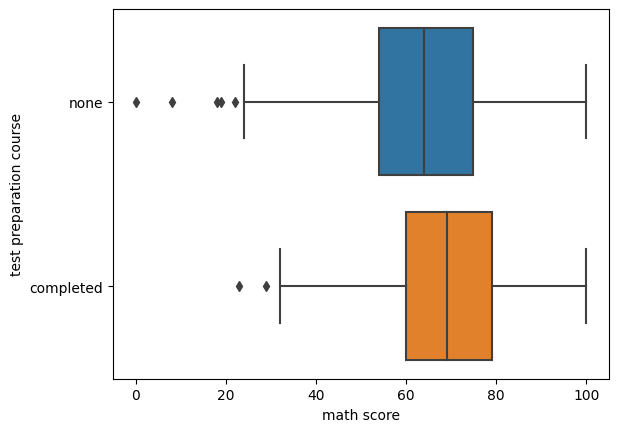

In [ ]:
sns.boxplot(data=Basedados, x='math score', y='test preparation course')

In [ ]:
Basedados.groupby(by=['test preparation course']).describe()['math score'].reset_index()

,test preparation course,count,mean,std,min,25%,50%,75%,max
0,completed,358.0,69.695531,14.444699,23.0,60.0,69.0,79.00,100.0
1,none,642.0,64.077882,15.192376,0.0,54.0,64.0,74.75,100.0


Alunos que se prepararam tiveram uma performace melhor.



* **Representação gráfica do relacionamento entre duas variáveis - math score, writing score -**


<Axes: xlabel='math score', ylabel='writing score'>

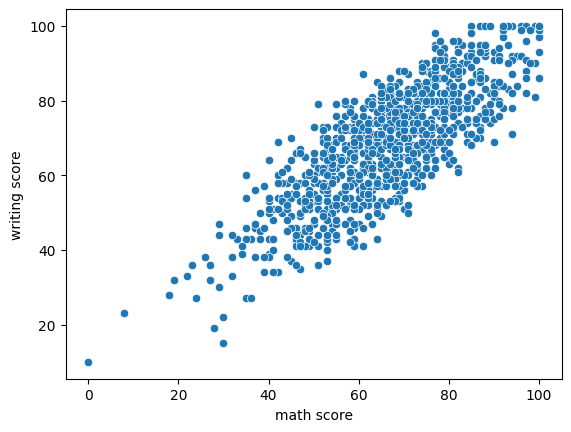

In [ ]:
sns.scatterplot(data = Basedados, x='math score', y='writing score')